<h1 style="color:#4FC3F7;">2. SEGUNDO PROYECTO</h1>



<h2 style="color:#81C784;">2.1 Conceptos previos</h2>

<h3 style="color:#EF9A9A;">2.1.1 Objetivo general</h3>  
Tenemos un conjunto de datos real del hundimiento del Titanic. Para cada pasajero conocemos cosas como:

- Sexo
- Edad
- Clase del boleto
- Precio pagado
- Puerto de embarque
- etc

**El objetivo es entrenar un modelo de Machine Learning que aprenda, a partir de esos datos, a responder:** ¿Esta persona sobrevivió o no? (Survived = 1 o Survived = 0)

Esto es un problema de:

- **Aprendizaje supervisado (tenemos la respuesta correcta en el entrenamiento)**
- **Clasificación binaria (dos clases: sobrevivió / no sobrevivió)**


<h3 style="color:#EF9A9A;">2.1.2 ¿Qué es pandas y por qué lo usamos?</h3>  
<code>pandas</code> es una librería de Python para trabajar con <b>datos en forma de tablas</b> , como si fueran:

- Excel
- Google Sheets
- Tablas SQL

`pandas` introduce dos estructuras clave:

| Estructura  | Qué es             |
| ----------- | ------------------ |
| `Series`    | Una columna        |
| `DataFrame` | Una tabla completa |

**El dataset Titanic es una tabla, por eso pandas es la herramienta correcta.**

<h3 style="color:#EF9A9A;">2.1.3 Los archivos del proyecto Titanic</h3>  


Tienes dos archivos CSV:

| Archivo     | Para qué sirve                               |
| ----------- | -------------------------------------------- |
| `train.csv` | Entrenar el modelo (incluye `Survived`)      |
| `test.csv`  | Datos nuevos sin respuesta (para predicción) |

*CSV significa Comma Separated Values*. Es texto plano, cada fila es una persona, cada columna una característica.


<h2 style="color:#81C784;">2.2 Introducción</h2>

<h3 style="color:#EF9A9A;">2.2.1 Cargar los datos</h3>  

Primero importaremos la librería `pandas`. `pandas` siempre se importa como pd

In [253]:
import pandas as pd

Leemos el archivo CSV

In [254]:
train = pd.read_csv("train.csv")

- `pd.read_csv()` : función de pandas que:
    - Abre el archivo
    - Lee cada fila
    - Construye una tabla en memoria
- `train` : variable que ahora contiene un DataFrame

`train` ahora es como un Excel dentro de Python.

In [255]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Muestra las primeras 5 filas y el encabezado
- No modifica nada
- Solo sirve para explorar

In [256]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Esto indica:

- El dataset contien 891 pasajeros
- Cuántas filas hay
- Cuántas columnas
- Tipos de datos (números, texto)
- Dónde hay valores faltantes (NaN)

<h3 style="color:#EF9A9A;">2.2.2 Entendiendo el dataset Titanic</h3>  
<b>¿Qué representa cada columna y por qué podría ayudar (o no) a predecir la supervivencia?</b>

Primero, listemos las columnas:

In [257]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h4 style="color:#BA68C8;">a. PassengerId</h4>

- Es un identificador único - int64
- **¿Tiene relación con sobrevivir? : No**
- NO aporta información. Se elimina más adelante


<h4 style="color:#BA68C8;">b. Survived</h4>

- **Valores disponibles**

    - 0 = No sobrevivio
    - 1 = Sobrevivio

Esto es lo que queremos predecir

Es `y`, la variable objetivo, etiqueta (label). Está en `train.csv` pero no en `test.csv`


<h4 style="color:#BA68C8;">c. Pclass (Clase del pasajero)</h4>

- **Valores disponibles**

    - 1 = Primera clase
    - 2 = Segunda clase
    - 3 = Tercera clase

- **Interpretación**

    - Primera clase = más cerca de botes
    - Tercera clase = más abajo en el barco

- **Hipotesis**

    - A mayor clase, mayor probabilidad de sobrevivir

Variable MUY importante





<h4 style="color:#BA68C8;">d. Name</h4>

- **Valores disponibles**

    - Texto largo
    - Incluye títulos:

        - Mr
        - Mrs
        - Miss
        - Master

- **Interpretación**

    - El nombre completo no sirve para el análisis, pero tal vez los titulos de cortesia sí

- **Hipótesis**

    - Según la página de wikipedia: https://en.wikipedia.org/wiki/English_honorifics

        | Título | Significado   |
        | ------ | ------------- |
        | Mr     | Hombre adulto |
        | Mrs    | Mujer casada  |
        | Miss   | Mujer soltera |
        | Master | Niño          |

    - ¿Las posibilidades de que una persona adulta se salve son mayores a la de un niño?. Es un caso muy importante a considerar



<h4 style="color:#BA68C8;">e. Sex</h4>

- **Valores disponibles**

    - male (hombre)
    - female (mujer)

- **Interpretación**

    - Existe una frase muy popular : "Mujeres y niños primero". 

- **Hipótesis**

    - Existe la posibilidad que la frase haya tomado un peso importante en este accidente.


<h4 style="color:#BA68C8;">f. Age</h4>

- **Valores disponibles**

    - Edad en años - *float64¨*
    - Muchos valores faltantes (NaN). 714 personas de 891 tienen asignada una edad. *177 personas no tienen una edad asignada*
    - En el data set se menciona algo importante:

        - **La edad es fraccionaria si es inferior a 1. Si se estima la edad, es en forma de xx.5.**
        
          <span style="color:#FFEB3B; font-weight:bold;">
          Quiere decir que un bebe de menos de 1 año, tendra la edad de "0.25, 0.42, etc" por ejemplo. Y si se desconoce la edad de una persona, se coloca de la forma "20.5, 35.5, etc".
          </span>

- **Interpretación e hipótesis**

    - Los niños tendrían mayor prioridad
    - Los adultos mayores tienen menos movilidad

- **Problema**

    - Datos faltantes
    - Debe limpiarse


<h4 style="color:#BA68C8;">g. SibSp (Hermanos / esposos a bordo)</h4>

- **Valores disponibles**

  - Número entero : 0, 1, 2, ... - *Int64*
  - En el data set se menciona algo importante:

    - **El conjunto de datos define las relaciones familiares de esta manera** : 

      - **Hermano** = hermano, hermana, hermanastro, hermanastra
      - **Cónyuge** = marido, mujer (las amantes y prometidas fueron ignoradas)

- **Posible efecto :**

  - Familias pequeñas =  ayuda mutua
  - Familias grandes = caos


<h4 style="color:#BA68C8;">h. Parch (Padres / hijos a bordo)</h4>

Similar a `SibSp`

- **Valores disponibles**

  - Número entero : 0, 1, 2, ... - *Int64*
  - En el data set se menciona algo importante:

    - **El conjunto de datos define las relaciones familiares de esta manera** : 

      - **Padre** = madre, padre
      - **Niño** = hija, hijo, hijastra, hijastro
      - Algunos niños viajaban sólo con una niñera, por lo que `parch = 0` para ellos.

<h4 style="color:#BA68C8;">i. Ticket </h4>

- **Valores disponibles**
    - Código alfanumérico - Object

- **Interpretación**
    - Muy variado
    - Poco significado directo



<h4 style="color:#BA68C8;">j. Fare (Precio del boleto) </h4>

- **Valores disponibles**
    - Número real - *float64*

- **Interpretación**
    - Relacionado con la clase social

- **Hipótesis**
    - Pasajes más caros = clase alta = más probabilidades de sobrevivir


<h4 style="color:#BA68C8;">k. Cabin </h4>

- **Valores disponibles**
    - Código de cabina (ej: C85) - *object*
    - Muchos valores faltantes - 204 cabinas. 891 pasajeros.

- **Interpretación**
    - En el Titanic, las cabinas estaban organizadas por cubiertas (pisos del barco).
    - La letra inicial indica el Deck:

        - A, B, C, D, E, F, G
    
        Cada letra corresponde a una altura distinta del barco

- **Hipótesis**
    - **Ubicación física**

        - Cubiertas altas = más cerca de botes salvavidas
        - Cubiertas altas = más cerca de botes salvavidas

        El agua ingresa primero por la parte inferior del barco
    
    - **Relación con la clase social**

        - Decks A, B, C = pasajeros de primera clase
        - Decks E, F, G = clases más bajas
    
        La clase social fue uno de los factores más importantes en la supervivencia
    
    - **Asignacion de cabinas**

        - Tener cabina asignada ya dice algo
        - Podría indicar mayor nivel socioeconómico



<h4 style="color:#BA68C8;">l. Embarked (Puerto de embarque)</h4>
La variable Embarked indica el puerto donde el pasajero subió al Titanic

Es una variable categórica nominal (object), es decir:

- No tiene orden natural
- No es una escala numérica

- **Valores disponibles**
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton - *object*

- **Interpretación e hipótesis**

Puede reflejar

- Clase social
- Tipo de pasajero


<h2 style="color:#81C784;">2.3 Análisis Exploratorio de Datos (EDA)</h2>

EDA (Exploratory Data Analysis) significa: *Mirar los datos, entenderlos y descubrir patrones antes de entrenar cualquier modelo.*

En el Titanic queremos responder preguntas como:

- ¿Cuántas personas sobrevivieron?
- ¿Sobrevivieron más mujeres que hombres?
- ¿La clase social influyó?
- ¿La edad influyó?

Estas respuestas nos dirán:

- Qué variables son importantes


<h4 style="color:#BA68C8;">a. ¿Cuántos sobrevivieron?</h4>


In [258]:
train["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

- `train["Survived"]` = selecciona la columna

- `.value_counts()` = cuenta cuántas veces aparece cada valor

- **Interpretación**
    - Murieron más personas de las que sobrevivieron
    - Dataset desbalanceado - *Un modelo podría “engañarnos” prediciendo siempre que - no sobrevivió -*

- **Porcentaje de supervivencia**


In [259]:
train["Survived"].value_counts(normalize=True)


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Solo 38% sobrevivió

<h4 style="color:#BA68C8;">b. Supervivencia por sexo</h4>


In [260]:
train.groupby("Sex")["Survived"].mean() # female = mujer. male = hombre

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- `groupby("Sex")`
    - Agrupa filas por sexo

- `["Survived"]`
    - Selecciona la columna que nos interesa. En este caso "Survived"

- `.mean()`
    - Calcula el promedio

Como Survived es 0 y 1, el promedio es el porcentaje de supervivencia.

- **Interpretación**
    - 74% de mujeres sobrevivieron
    - 19% de hombres sobrevivieron

- **Explicacion extra del codigo para mi**

    - Imaginaremos esta tabla:

    | Persona | Sexo   | Survived   |
    | ------- | ------ | ---------- |
    | A       | Hombre | 0          |
    | B       | Hombre | 0          |
    | C       | Hombre | 1          |
    | D       | Mujer  | 1          |
    | E       | Mujer  | 1          |
    | F       | Mujer  | 1          |

    - PASO 1: Separar por sexo `(groupby("Sex"))`

        Grupo HOMBRES : 0, 0, 1

        Grupo MUJERES : 1, 1, 1
    
    - PASO 2: Tomar SOLO la columna `Survived`

        Hombres = [0, 0, 1]

        Mujeres = [1, 1, 1]

    - PASO 3: Tomar Calcular el promedio `(mean())`

        HOMBRES
        
        Suma = 0 + 0 + 1 = 1. Total = 3. Promedio hombres = 1 / 3 ​ = 0.33 - *33% sobrevivió*

        MUJERES

        Suma = 1 + 1 + 1 = 3. Total = 3. Promedio mujeres = 3 / 3 = 1.00 - *100% sobrevivó*



<h4 style="color:#BA68C8;">c. Supervivencia por clase (Pclass)</h4>


In [261]:
train.groupby("Pclass")["Survived"].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

- **Interpretación**
    - Primera clase: mucha supervivencia
    - Tercera clase: muy baja

A mayor clase, mayor facilidad de accesibilidad a los botes :c

<h4 style="color:#BA68C8;">d. Edad y supervivencia</h4>


In [262]:
train["Age"].isna().sum()


np.int64(177)

Esto nos dice cuántos valores NaN o vacío hay.

In [263]:
train["Age"].min()



np.float64(0.4167)

Esto nos da la edad mas pequeña del dataset. Eso es un bebé de ~5 meses

In [264]:
train["Age"].max()


np.float64(80.0)

Esto nos da la edad mas grande del dataset

In [265]:
train.groupby(pd.cut(train["Age"], bins=5))["Survived"].mean()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2904\1503152090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(pd.cut(train["Age"], bins=5))["Survived"].mean()


Age
(0.337, 16.333]     0.550000
(16.333, 32.25]     0.369942
(32.25, 48.167]     0.404255
(48.167, 64.083]    0.434783
(64.083, 80.0]      0.090909
Name: Survived, dtype: float64

- `pd.cut()` =  divide edades en rangos
- `bins = 5` = es el numero de intervalos que crea
- `grouopby()` = Separa por intervalos de edades debido al *(pd.cut( tra ....))*

Agrupa personas por rango de edad

Me rresultó raro que el primer intervalo sea *( 0.337 , 13.33 )* sabidendo que la edad mas pequeña del data set es de *0.4167*. Esto se debe
a que `pd.cut` ajusta los límites ligeramente hacia afuera para asegurarse de que todos los valores entren en algún intervalo. A esto se le 
llama *padding numerico*. Este nombre se recuerda mucho a la tecnica padding o rellenado de ceros que se usa en procesamieno de imagenes para calcular la mediana de uan imagen :D. 

- **Interpretación**
    - Niños sobreviven más
    - Adultos mayores sobreviven menos


<h4 style="color:#BA68C8;">e. Precio del boleto (Fare)</h4>


In [266]:
train.groupby(pd.qcut(train["Fare"], 4))["Survived"].mean()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2904\1656600909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(pd.qcut(train["Fare"], 4))["Survived"].mean()


Fare
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

`pd.cut` → divide por rangos de valores

`pd.qcut` → divide por cantidad de personas

- **Explicacion extra del codigo para mi**

    1. Imaginaremos que tenemos 8 personas que tienen los siguientes precios de boleto:

        - [5, 7, 8, 10, 20, 30, 80, 100]
    
    2. ¿Qué hace pd.qcut(..., 4)?

        - Divide en 4 grupos con la misma cantidad de personas. DIVIDE EN 4 PORQUE EN EL CODIGO SE PUSO QUE "  . . . n["Fare"], **4** ". En cuartiles
        - Como hay 8 personas: Cada grupo tendrá 2 personas y se obtiene algo así:

            | Grupo | Personas      | Rangos aproximados |
            | ----- | ------------- | ------------------ |
            | Q1    | 2 más baratos | 5 – 7              |
            | Q2    | siguientes 2  | 8 – 10             |
            | Q3    | siguientes 2  | 20 – 30            |
            | Q4    | 2 más caros   | 80 – 100           |



- **Interpretación**
    - Ordena a todos los pasajeros por `Fare` (de barato a caro)
    - Divide en 4 grupos iguales (cuartiles):

        - 25% más barato
        - 25% siguiente
        - 25% siguiente
        - 25% más caro
    - Para cada grupo, calcula: survived = sobrevivientes / personas del grupo

- **Hipotesis**
    - Cuartil más caro = mayor supervivencia
    - Cuartil más barato → menor supervivencia

Esto nos muestra la importancia del efecto social.

<h3 style="color:#EF9A9A;">2.2.1 EDA VISUAL</h3>  


In [267]:
import matplotlib.pyplot as plt


<h4 style="color:#BA68C8;">a. ¿Cuántos sobrevivieron?</h4>


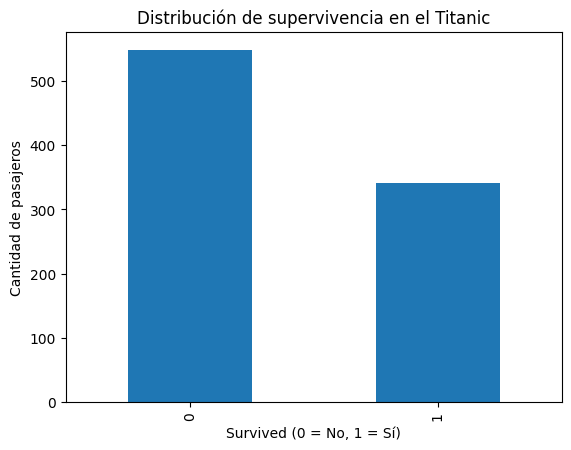

In [268]:
train["Survived"].value_counts().plot(kind="bar")
plt.xlabel("Survived (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de pasajeros")
plt.title("Distribución de supervivencia en el Titanic")
plt.show()


<h4 style="color:#BA68C8;">b. Supervivencia por sexo</h4>


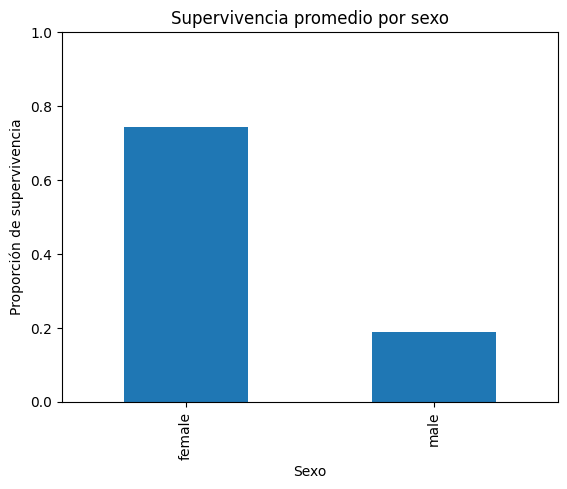

In [269]:
train.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.xlabel("Sexo")
plt.ylabel("Proporción de supervivencia")
plt.title("Supervivencia promedio por sexo")
plt.ylim(0,1)
plt.show()


<h4 style="color:#BA68C8;">c. Supervivencia por clase</h4>


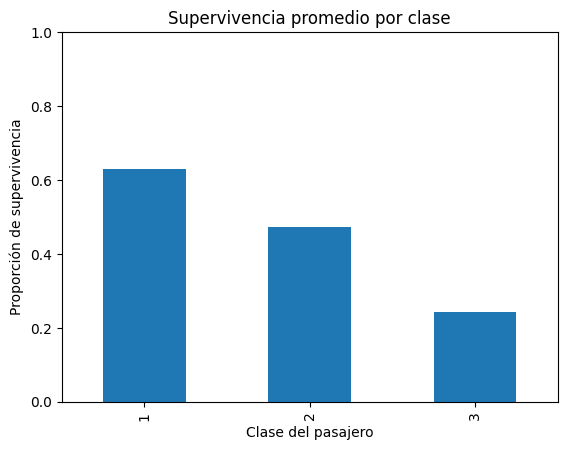

In [270]:
train.groupby("Pclass")["Survived"].mean().plot(kind="bar")
plt.xlabel("Clase del pasajero")
plt.ylabel("Proporción de supervivencia")
plt.title("Supervivencia promedio por clase")
plt.ylim(0,1)
plt.show()


<h4 style="color:#BA68C8;">d. Distribución de edades</h4>


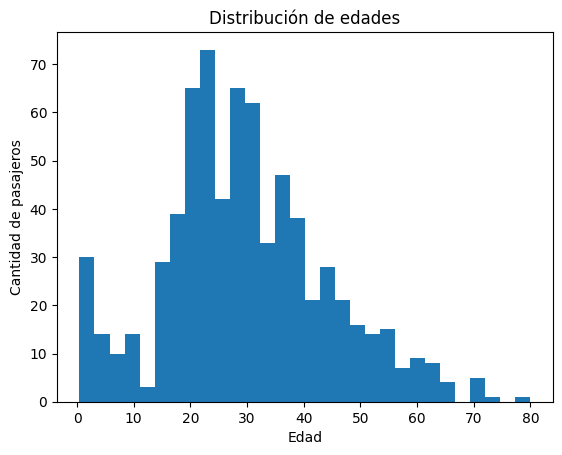

In [271]:
train["Age"].plot(kind="hist", bins=30)
plt.xlabel("Edad")
plt.ylabel("Cantidad de pasajeros")
plt.title("Distribución de edades")
plt.show()


<h4 style="color:#BA68C8;">e. Precio del boleto (Fare)</h4>


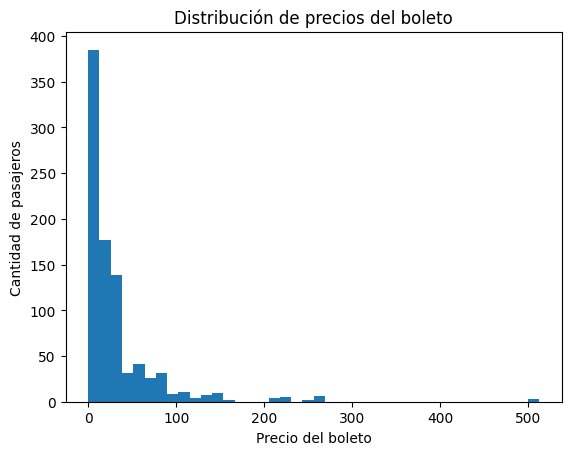

In [272]:
train["Fare"].plot(kind="hist", bins=40)
plt.xlabel("Precio del boleto")
plt.ylabel("Cantidad de pasajeros")
plt.title("Distribución de precios del boleto")
plt.show()


<h2 style="color:#81C784;">2.4 Limpieza de datos (Data Cleaning)</h2>

Los modelos de Machine Learning NO toleran:
- Valores vacíos (NaN)
- Texto sin convertir a números

Un modelo no es inteligente, solo hace calculos matemáticos

En el EDA concluimos que:

| Columna       | Problema                  |
| ------------- | ------------------------- |
| Age           | Valores faltantes         |
| Embarked      | Algunos valores faltantes |
| Cabin         | Muchos valores faltantes  |
| Sex           | Texto                     |
| Embarked      | Texto                     |
| Name / Ticket / PassengerId | Poco útiles               |


<h4 style="color:#BA68C8;">a. ¿Qué es un valor faltante (NaN)?</h4>

Significa *Not a Number*. Representa datos desconocidos o no registrados.

En `pandas` 

- NaN != 0
- NaN != ""
- NaN = desconocido

In [273]:
train.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Este código permite ver cuántos valores faltantes hay. 

- `Cabin` está casi vacía
- `Age` es recuperable
- `Embarked` casi completa

<h4 style="color:#BA68C8;">
  b. ¿Qué haremos con 
  <span style="color:#7E57C2; font-weight:bold;">cabin</span>?
</h4>

La variable `Cabin` presenta una gran cantidad de valores faltantes (más del 75%), lo que dificulta su uso directo en el modelo. Además, su formato no es uniforme y requiere un procesamiento adicional *(Me refiero a la diferencia que hay entre sus valores, como por ejemplo: B58, C85, E46)* . 

Por estas razones, se decidió excluirla del modelo base. 

**Sin embargo, parte de la información contenida en esta variable, como la cubierta del barco (Deck), podría aprovecharse en un análisis más avanzado mediante ingeniería de características.**

La `ingeniería de características (feature engineering)` es el proceso de: crear, transformar o seleccionar variables a partir de los datos originales para que un modelo de Machine Learning pueda aprender mejor.

En este caso una buena idea sería separar las letras iniciales de los valores de la columna `Cabin`. Del siguiente ejemplo: Cabin = "C85", extraemos lo importante: Deck = "C". Ahora el modelo puede aprender:

- Deck C → cubiertas altas
- Cubiertas altas → más supervivencia


In [274]:
train = train.drop(columns=["Cabin"])


- `drop` elimina columnas o filas.

<h4 style="color:#BA68C8;">
  c. ¿Qué haremos con 
  <span style="color:#7E57C2; font-weight:bold;">age</span>?
</h4>

Rellenaremos los valores faltantesa a través de un promedio


In [275]:
train["Age"] = train["Age"].fillna(train["Age"].median())


Se hizo uso de la mediana y no del promedio debido a que la mediana es menos sensible a valores extremos.

<h4 style="color:#BA68C8;">
  d. ¿Qué haremos con 
  <span style="color:#7E57C2; font-weight:bold;">Embarked</span>?
</h4>

Rellenaremos los valores faltantes con el más común

In [276]:
train["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Observamos que el más frecuente es el `S`

In [277]:
train["Embarked"] = train["Embarked"].fillna("S")


<h4 style="color:#BA68C8;">
  e. ¿Qué haremos con las
  <span style="color:#7E57C2; font-weight:bold;">Columnas inncesarias</span>?
</h4>

A inicios del apartado 2.3 se mencionó que se eliminarían las siguiente columnas:



In [278]:
train = train.drop(columns=["PassengerId", "Ticket", "Name"])


Para este modesto proyecto, se concluyó que no aportan información directa al objetivo.

<h4 style="color:#BA68C8;">
  f. ¿Qué haremos con
  <span style="color:#7E57C2; font-weight:bold;">las columnas que tienen de valores texto?</span>?
  (Las pasaremos a numeros obviamente) xd
</h4>

Valores como estos: `male`, `female`, `S`, `C` y  `Q`, no sirven.

Necesitamos números.





**1. Convertir `Sex`**

In [279]:
train["Sex"] = train["Sex"].map({
    "male": 0,
    "female": 1
})


**2. Convertir `Embarked`**

El uso de **variables dummy**  se estará explicando mas adelante

Usamos C como categoría de referencia `(drop_first=True)`:

In [280]:
embarked_dummies = pd.get_dummies(
    train["Embarked"],
    prefix="Embarked",
    drop_first=True
)



Esto crea:

- Embarked_S
- Embarked_Q

*(Southampton (C) queda implícito)*

In [281]:
train = pd.concat([train, embarked_dummies], axis=1)
train.drop("Embarked", axis=1, inplace=True)


**Esto une al dataset las nuevas columnas y elimina la columna original**

Ahora por ultimo veamos el estado actual de nuestra dataset

In [282]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


- Todo numérico
- Listo para Machine Learning

<h4 style="color:#BA68C8;">
  g. Separaremos
  <span style="color:#7E57C2; font-weight:bold;">variables (X) y objetivo (y)</span>
</h4>

In [283]:
X = train.drop("Survived", axis=1)
y = train["Survived"]


`X = train.drop("Survived", axis=1)`

- `train` = la tabla completa
- `.drop("Survived", axis=1)` = elimina la columna `Survived`
- `axis = 1` → significa columnas (no filas)

**X tiene todas las columnas EXCEPTO Survived**

`y = train["Survived"]`
- selecciona solo la columna `Survived`

**X → lo que el modelo usa para aprender**

**y → la respuesta correcta**

<h2 style="color:#81C784;">2.5 PRIMER modelo de Machine Learning</h2>

Un modelo de Machine Learning es una función matemática que:
- Recibe datos (X)
- Aprende patrones comparándolos con respuestas reales (y)
- Luego puede predecir respuestas nuevas

**No “piensa”, ajusta números.**

El presente problema se trata de:

- Clasificación → predecimos una clase
- Binaria → 0 o 1

Se trata de un **clasificador binario**.

<h4 style="color:#BA68C8;">
  <span style="color:#7E57C2; font-weight:bold;">A. PRIMER MODELO. <span style="color:#FFEB3B; font-weight:bold;">
Logistic Regression
</span>
</span>
</h4>

In [284]:
from sklearn.linear_model import LogisticRegression


Vamos a empezar con Logistic Regression, no porque sea la mejor, sino porque es: Simple, Interpretativa e Ideal para aprender

<h4 style="color:#BA68C8;">
  b. Crear el modelo
</h4>

In [285]:
model = LogisticRegression(max_iter=1000)


- `LogisticRegression` = tipo de modelo
- `model` = instancia (objeto)
- `max_iter = 1000` = número máximo de iteraciones. Sin esto, el modelo puede no converger. Es el límite de pasos que el algoritmo puede dar para aprender.

<h4 style="color:#BA68C8;">
  c. Entrenar el modelo (fit)
</h4>

In [286]:
model.fit(X, y)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

Durante el entrenamiento:

1. Toma los datos X
2. Compara con y
3. Ajusta coeficientes internos
4. Minimiza el error

Esto es aprender. Dicho de otra manera: 

*Mira estas preguntas (X) y estas respuestas correctas (y), y aprende la relación entre ambas.”*

<h4 style="color:#BA68C8;">
  d. Hacer predicciones
</h4>

In [287]:
y_pred = model.predict(X)

Estamos prediciendo sobre los mismos datos de entrenamiento.

Dicho de otra manera:

*`model.predict(X)` = “Aquí están las preguntas que ya conocías, dime qué responderías* o *“Respóndeme las mismas preguntas que ya te enseñé*

<h4 style="color:#BA68C8;">
  e. Evaluar el modelo (accuracy)
</h4>

In [288]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred)


0.8002244668911336

**Interpretación:**

- Devuelve un número entre 0 y 1
- En este caso fue de 0.80 = 80% de aciertos. *Accuracy = total de predicciones / predicciones correctas​*
- Eso quiere decir que el modelo aprendió patrones
- Tambien significa que nuestras variables tienen información útil

<h4 style="color:#BA68C8;">
  <span style="color:#7E57C2; font-weight:bold;">F. PROBLEMA ACTUAL</span>
</h4>

Hasta el momento hicimos esto: `model.fit(X, y)` y `y_pred = model.predict(X)` con los que obtuvimos una accuracy decente.

Pero hay un problema grave: **El modelo fue evaluado con los mismos datos que usó para aprender.**

**Un buen modelo no memoriza, aprende patrones generales  y deben funcionar con datos nuevos que nunca ha visto.** Aqui sobresale un concepto clave.

<span style="color:#FFEB3B; font-weight:bold;">
Overfitting (sobreajuste)
</span>

Overfitting ocurre cuando el modelo aprende demasiado bien los datos de entrenamiento pero falla con datos nuevos


<h4 style="color:#BA68C8;">
  g. La solución: dividir los datos
</h4>

| Parte | Para qué sirve          |
| ----- | ----------------------- |
| Train | El modelo aprende       |
| Test  | Evaluamos si generaliza |

Normalmente: 70% / 30% o 80% / 20%


<h4 style="color:#BA68C8;">
h. Usaremos train_test_split
</h4>

In [289]:
from sklearn.model_selection import train_test_split

- `train_test_split(...)` : Función que divide los datos aleatoriamente.

In [290]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


- `X`, `y`
    - Datos (X)
    - Respuestas correctas (y)

- `test_size=0.2`
    - 20% para prueba
    - 80% para entrenamiento

- `random_state = 42`
    - Le dice a python "Usa siempre la misma forma de mezclar los datos"- El 42 no es algo especial
    - Siempre se obtiene la misma partición

<h4 style="color:#BA68C8;">
i. Ahora si entrenaremos el modelo correctamente
</h4>

In [291]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

El modelo solo ve los datos de entrenamiento

<h4 style="color:#BA68C8;">
j. Evaluaremos con datos nuevos
</h4>

In [292]:
y_test_pred = model.predict(X_test)

Estamos haciendo uso de los "X" de test. En el ejemplo anterior se hizo uso de la misma tabla "X" para entrenar y predecir. 

Ahora le estamos dando a nuestro modelo valores que nunca vió.

<h4 style="color:#BA68C8;">
k. Accuracy real
</h4>

In [293]:
accuracy_score(y_test, y_test_pred)


0.8100558659217877

Este número:
- Es más bajo que antes, pero es realista. *Accuracy = total de predicciones / predicciones correctas​*
- Representa desempeño en datos nuevos
- En este caso fue de 0.81 = 81% de aciertos.


<h2 style="color:#81C784;">2.6 ¿Qué aprendió el PRIMER modelo de Machine Learning?</h2>
¿En qué se está basando el modelo para decidir quién sobrevive?

<h4 style="color:#BA68C8;">
a. ¿Por qué podemos interpretar este modelo?
</h4>

Usamos `Logistic Regression` y tiene algo clave: *Coeficientes interpretables*

Cada variable tiene un peso que indica:

- Dirección del efecto
- Intensidad del efecto

<h4 style="color:#BA68C8;">
b. Coeficientes del modelo
</h4>
Para poder visualizar los coeficientes del modelo, se hace uso de este codigo:

In [294]:
model.coef_ # Devuelve una matriz 2D


array([[-9.38441236e-01,  2.59135749e+00, -3.05881281e-02,
        -2.95427736e-01, -1.08014556e-01,  2.57594430e-03,
        -1.12664282e-01, -3.99568195e-01]])

In [295]:
model.coef_.shape # (1,7) = (filas, columnas). Da una matriz de 1 fila y 7 columnas

(1, 8)

Pero así no se entiende nada de nada. Así que

<h4 style="color:#BA68C8;">
c. Asociaremos coeficientes con variables
</h4>

In [296]:
coef_df = pd.DataFrame({
    "Variable": X.columns, # Selecciona las variables de las columnas del dataset X
    "Coeficiente": model.coef_[0] # Selecciona la primera fila. "Dame la fila número 0 de esta matriz". Y como solo existe una fila, esa fila es toda la información.
})

coef_df


,Variable,Coeficiente
0,Pclass,-0.938441
1,Sex,2.591357
2,Age,-0.030588
3,SibSp,-0.295428
4,Parch,-0.108015
5,Fare,0.002576
6,Embarked_Q,-0.112664
7,Embarked_S,-0.399568


In [297]:
model.coef_[0]

array([-9.38441236e-01,  2.59135749e+00, -3.05881281e-02, -2.95427736e-01,
       -1.08014556e-01,  2.57594430e-03, -1.12664282e-01, -3.99568195e-01])

Ahora NO es una matriz, es un vector 1D:

In [298]:
model.coef_[0].shape

(8,)

<h4 style="color:#BA68C8;">
d. ¿Cómo interpretar un coeficiente?
</h4>

**Regla general en Logistic Regression**:

- Coeficiente positivo (+): Aumenta la probabilidad de sobrevivir
- Coeficiente negativo (−): Disminuye la probabilidad de sobrevivir
- Valor grande (en magnitud): Variable más influyente

`sex` = 2.582422490819191

- 1. Recordemos que `male`: 0 y `female`: 1
- 2. Tenemos un coeficiente de 2.8
- 3. El término matemático es: 2.8 * Sex
- 4. Veamos los casos
    - Caso A: Sex = 0. 2.8 * 0 = 0. NO APORTA NADA a la ecuación DEL MODELO. 
    - Caso B: Sex = 1. 2.8 * 1 = 2.8. SUMA 2.8 al modelo
- 5. **Entonces como Sex = 1 es mujer, ser mujer incrementa fuertemente la probabilidad de sobrevivir**



`Pclass` = -0.9581117994878331

- 1. Recordemos que
    - 1 = Primera clase
    - 2 = Segunda clase
    - 3 = Tercera clase

- 2. Veamos qué aporta cada clase a z (*funcion de la regresion logistica* )
    - Primera clase (Pclass = 1) = −0.958 × 1 = −0.958
    - Segunda clase (Pclass = 2) = −0.958 × 2 = −1.916
    - Tercera clase (Pclass = 3) = −0.958 × 3 = −2.874
- 3. Mientras más alta el número de clase, más negativo se vuelve z
- 4. Un z más negativo → menor probabilidad de supervivencia
- 5. **Es por eso que a mayor número de clase (3ra clase),  menor supervivencia**

`Fare (precio del boleto)`  = 0.0028637833270046364

- 1. Para `Fare`, el término es: 0.0028 x `Fare`. Ese valor se suma al valor interno del modelo `(z)`.
- 2. El coeficiente es positivo, amenta `z`
- 3. Es pequeño, es por eso que el efecto es gradual, no brusco
- 4. Se activa por cada unidad de Fare, o sea por cada 1 dola o libra, lo que sea. 
- 5. Casos concretos: 
    - Caso A: Fare = 10. Entonces 0.00286378 * 10 = 0.0286. *Aporta muy poco al modelo*
    - Caso B: Fare = 50. Entonces 0.00286378 * 50 = 0.143. *Empieza a notarse*
    - Caso C: Fare = 100. Entonces 0.00286378 * 100 = 0.286. *Suma un valor relevante a `z`*
- 6. Es por eso que **Mayor precio del boleto = mayor supervivencia**. Representa estatus social

`age` = -0.031167151003306817

1. Para Age, el término matemático es: `-0.03116715 × Age`. Este valor se suma al valor interno del modelo `(z)`.
2. Este valor se suma al valor interno del modelo `(z)`.
3. El coeficiente es negativo, por lo tanto disminuye `z`.
4. El efecto se activa por cada unidad de `Age`, es decir, por cada año adicional de edad.
5. Casos concretos:
    - Caso A: Age = 5. Entonces −0.03116715 × 5 = −0.156. *Disminuye ligeramente el valor de z.*
    - Caso B: Age = 30. Entonces −0.03116715 × 30 = −0.935. *Reduce de forma notable el valor interno del modelo.*
    - Caso C: Age = 60. Entonces −0.03116715 × 60 = −1.870. *Resta un valor importante al modelo.*
6. Por esta razón, **a mayor edad, menor probabilidad estimada de supervivencia, según lo aprendido por el modelo.**

`SibSp (Hermanos / esposos a bordo)` = -0.3028580935042213  y  `Parch (Padres / hijos a bordo)` = -0.10098795539205505

- Para este modesto proyecto, no se tomará en cuenta estos coeficientes. 
- Esto debido a que los coeficientes son pequeños y cuenta con poco impacto individual.
- **No significa que no sirvan, yo di en un inicio posibilidades de sacarle el maximo provecho a esta variable, es solo que el efecto es menor y tratar de que funcione y tenga alto impacto, requiere mas tiempo de analisis.**

`Embarked` = 0.22287150473084766


<span style="color:#FFEB3B; font-weight:bold;">
AQUI ME DI CUENTA QUE ASIGNÉ DE MANERA ERRONEA ESTA VARIABLE
</span>

En el apartado de *2.4 Data cleaning*, hice la siguiente asignacion:

```
train["Embarked"] = train["Embarked"].map({
    "S": 0,
    "C": 1,
    "Q": 2
})
```
Esto es debido a que:
- NO hay orden real
- Son categorías nominales
- Convertirlas a números crea una relación falsa

El modelo cree que: Q > C > S. Eso no es verdad matemáticamente

Debemos corregirlo mediante:

<span style="color:#FFEB3B; font-weight:bold;">
1. One-Hot Encoding (Variables Dummy)
</span>

Se crean columnas binarias, por ejemplo:

- Embarked_C
- Embarked_Q
- Embarked_S

Cada una vale:

- 1 si el pasajero embarcó allí
- 0 si no

Normalmente se elimina una para evitar <span style="color:#FFEB3B; font-weight:bold;">
multicolinealidad (baseline).
</span>
*(La multicolinealidad ocurre cuando una variable puede expresarse como combinación lineal de otras.)*

Ejemplo: usamos S como referencia.

**2. Explicacion del tipo de variable y el porque ahora hay dos columnas de Embarked y un coeficientes para cada una**

- ¿Por qué ahora tienes dos columnas Embarked?

    - Embarked_Q  (bool)
    - Embarked_S  (bool)

Esto fue gracias a realizar el *One-Hot Encoding*

- Si existen `Embarked_Q` y `Embarked_S`, entonces la categoría de referencia es `Embarked_C (Cherbourg)`. Cherbourg NO aparece como columna, pero está implícita.

- Internamente, el modelo los trata así: False = 0. True = 1
- Para Embarked ahora tienes DOS términos:

    - -0.11 × Embarked_Q
    - -0.30 × Embarked_S

**3. Interpretación correcta de cada coeficiente**

- `Embarked_Q` = -0.11
    - Se activa solo si el pasajero embarcó en Queenstown
    - Resta 0.11 al valor interno del modelo `(z)`
    - Efecto: Pequeño y ligeramente negativo

- `Embarked_S` = -0.30
    - Se activa solo si el pasajero embarcó en Southampton
    - Resta 0.30 a `z`
    - Efecto: Más fuerte y claramente negativo

**4. ¿Y qué pasa con Cherbourg (C)?**

- Cherbourg es la categoría base, es decir:

    - Si: 
        - Embarked_Q = 0
        - Embarked_S = 0

    - Entonces
        - Pasajero embarcó en Cherbourg

Y no se resta nada al modelo. Por eso Cherbourg queda como el puerto con mayor probabilidad de supervivencia, según el modelo

**PARA ENTENDER ESTO DE VERDAD, LEAMOS ESTO**
Cuando usamos dummies (one-hot encoding) como ahora: Embarked_Q y Embarked_S.

SIEMPRE hay una categoría que NO aparece con coeficiente. Esa categoría es la categoría de referencia. En este caso no existe el coeficiente `C (Cherbourg)`, es por eso que es la referencia

¿Qué significa "categoría de referencia"?: El efecto de C está incorporado en el intercepto del modelo. Es decir:

- C NO tiene coeficiente propio
- Su coeficiente es 0 implícitamente
- Todo se compara contra C

**Si el pasajero embarca en C:**

- Embarked_Q = 0
- Embarked_S = 0

no se suma nada = <span style="color:#FFEB3B; font-weight:bold;">
queda el baseline
</span>

**Si embarca en Q:**

- Embarked_Q = 1
- Embarked_S = 0

se suma −0.11

**Si embarca en S**:

- Embarked_Q = 0
- Embarked_S = 1

se suma −0.30

**Entonces podemos afirmar algo sobre C?**
Sí. 

- No decimos que C “sea bueno”
- **Decimos que Q y S son peores que C según el modelo**




<h4 style="color:#BA68C8;">
e. Visualizar los coeficientes
</h4>

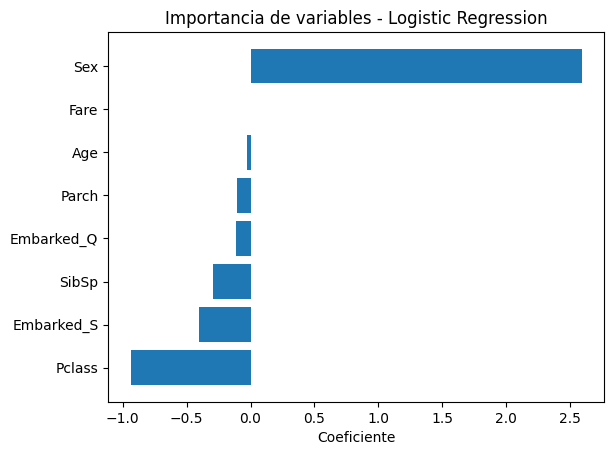

In [299]:
coef_df = coef_df.sort_values(by="Coeficiente")

plt.barh(coef_df["Variable"], coef_df["Coeficiente"])
plt.xlabel("Coeficiente")
plt.title("Importancia de variables - Logistic Regression")
plt.show()


Este grafico nos permie ver qué variables dominan

**El modelo predice supervivencia principalmente usando sexo, clase social y precio del boleto, lo cual concuerda con el contexto histórico del Titanic.**

<h2 style="color:#81C784;">2.7 MATRIZ DE CONFUSIÓN</h2>
¿Qué tipo de decisiones está tomando el modelo y dónde falla?

Ya tenemos:

- Un modelo entrenado
- Predicciones sobre X_test
- Una accuracy razonable

<h4 style="color:#BA68C8;">
a. ¿Qué es una matriz de confusión?
</h4>

- Es una tabla que cruza: *Realidad vs Predicción del modelo*

![Confusion Matrix](https://raw.githubusercontent.com/Josueeeoo-0/redes-neuronales-notebook-SIAFI/main/imagenes/image%20(1).png
)

- ¿Que quiere decir esto en nuestro proyecto?

    - TN → Personas que murieron y el modelo lo predijo bien
    - FP → El modelo dijo “sobrevivió”, pero murió
    - FN → El modelo dijo “murió”, pero sobrevivió
    - TP → Personas que sobrevivieron y el modelo acertó

**No todos los errores son iguales.**

<h4 style="color:#BA68C8;">
b. Creamos la matriz de confusión (numérica)
</h4>

In [300]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
cm


array([[90, 15],
       [19, 55]])

Acá me surgio la siguiente pregunta: ¿No se suponia que en el data set de prueba habían 891 personas?. ¿Porque en mi matriz solo se estan tomando en cuenta 179?.

Esto es debido a que la matriz de confusión NO se calcula sobre todo el dataset, solo sobre el conjunto de prueba (X_test, y_test). Recordemos que `test_size = 0.2`, esto
significa que se tomará el 20% de los 891 para prueba, lo cual equivale a aproximadamente 179, el numero que suman en la matriz xD.

Bueno, ahora sí veamos las conclusiones de esa matriz.

- **90 personas murieron y el modelo lo dijo bien**
- **55 personas sobrevivieron y el modelo acertó**
- **15 personas murieron pero el modelo dijo “sobrevivió”**
- **19 personas sobrevivieron pero el modelo dijo “murió”**

Ahora visualizemos la matriz en forma de calor

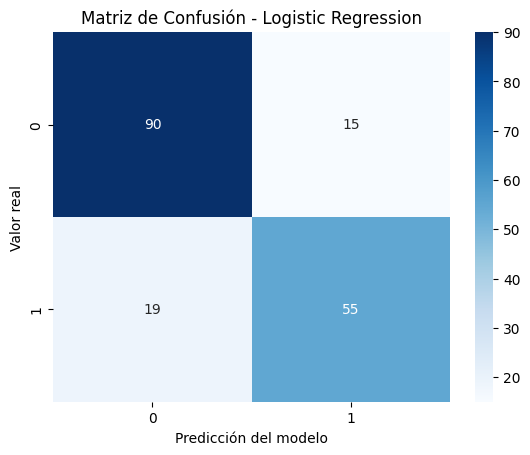

In [301]:
import seaborn as sns

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Predicción del modelo")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()


<h2 style="color:#81C784;">2.8 Prueba final. Uso del test.csv</h2>

<h4 style="color:#BA68C8;">
a. Limpieza
</h4>

Aplicaremos EXACTAMENTE la misma limpieza que con train.csv

In [302]:
test = pd.read_csv("test.csv")

In [303]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [304]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Hacen falta limpiar `Age`, `Fare` y `Cabin`

In [305]:
test = test.drop(columns=["Cabin"])

Se fue `cabin`

In [306]:
test["Age"] = test["Age"].fillna(test["Age"].median())

Rellenamos `Age`

In [307]:
test["Fare"] = test["Fare"].fillna(train["Fare"].median())


Rellenamos `Fare`

In [308]:
passenger_idss = test["PassengerId"]


In [309]:
test = test.drop(columns=["PassengerId", "Ticket", "Name"])


Veamos si todo va bien

In [310]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Listo, ahora toca mapear los valores

In [311]:
test["Sex"] = test["Sex"].map({
    "male": 0,
    "female": 1
})

In [312]:
embarked_dummies = pd.get_dummies(
    test["Embarked"],
    prefix="Embarked",
    drop_first=True
)

In [313]:
test = pd.concat([test, embarked_dummies], axis=1)
test.drop("Embarked", axis=1, inplace=True)


In [314]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,True,False
1,3,1,47.0,1,0,7.0000,False,True
2,2,0,62.0,0,0,9.6875,True,False
3,3,0,27.0,0,0,8.6625,False,True
4,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,False,True
414,1,1,39.0,0,0,108.9000,False,False
415,3,0,38.5,0,0,7.2500,False,True
416,3,0,27.0,0,0,8.0500,False,True


Está listo.

<h4 style="color:#BA68C8;">
b. Pruebas
</h4>

In [315]:
test_predictions = model.predict(test)


Ahora exportamos nuestro archivo csv y subamoslo a kaggle para ver el score :0

In [317]:
output = pd.DataFrame({
    "PassengerId": passenger_idss,
    "Survived": test_predictions
})

output.to_csv("predictions.csv", index=False)


LISTO. FUE SUBIDO. ESTO FUE LO QUE NOS SALIÓ

![CResultado](https://raw.githubusercontent.com/Josueeeoo-0/redes-neuronales-notebook-SIAFI/main/imagenes/image.png
)

<span style="color:#FFEB3B; font-weight:bold;">
Como mencione bastantes veces en este proyecto, existen muchas mejoras por hacer para maximizar el uso de las variables. Pero por temas de tiempo este será mi resultado.

Yo desconocía por completo el mundo de la inteligencia artificial, el machine learning y mas. Pero escucharlo a usted enseñar, depesertó en mi un interés por entender el detrás de cada línea de código. 

DISCULPE por entegar un trabajo tan largo, sentí que era necesario para mí. Poder volver a abrir el archivo y leer detenidamene cada celda y así entender como es que funciona cada comando. 


Gracias profesor, es usted increíble.
